In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("penguins.csv")# Adjust path if needed

# Display first few rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [7]:
selected_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]
df_selected = df[selected_features]

In [9]:
df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

# Display the sample dataset
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,40.5,18.9,180.0
1,39.6,20.7,191.0
2,42.9,17.6,196.0
3,49.8,17.3,198.0
4,37.6,17.0,185.0


In [11]:
df_sample = (df_sample - df_sample.min()) / (df_sample.max() - df_sample.min()) * 9 + 1

In [13]:
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,3.492958,7.0750,1.014913
1,3.112676,9.1000,1.035418
2,4.507042,5.6125,1.044739
3,7.422535,5.2750,1.048467
4,2.267606,4.9375,1.024234


In [15]:
df_sample.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,100.000000,100.000000,100.000000
mean,4.819718,5.279500,1.143295
std,2.319473,2.166692,0.895049
min,1.000000,1.000000,1.000000
25%,2.816901,3.784375,1.033088
50%,4.422535,5.443750,1.045671
75%,6.492958,6.878125,1.078293
max,10.000000,10.000000,10.000000


In [17]:
X = df_sample[["culmen_length_mm", "culmen_depth_mm"]].to_numpy()

In [19]:
def initialize_centroids(X, k):
    np.random.seed(42)
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [21]:
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [23]:
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [25]:
import numpy as np

def compute_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)  # Σ ||x_i - c_k||² for all x_i in cluster k
    return wcss

In [27]:
def kmeans(X, k, max_iters=100, tol=1e-4, track_path=False):
    centroids = initialize_centroids(X, k)
    centroid_history = [centroids.copy()] if track_path else None

    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

        if track_path:
            centroid_history.append(centroids.copy())

    wcss = compute_wcss(X, labels, centroids)
    return labels, centroids, wcss, centroid_history

In [29]:
import pandas as pd
from IPython.display import display

wcss_values = []
k_values = list(range(1, 8))

for k in k_values:
    labels, centroids, wcss, _ = kmeans(X, k)
    wcss_values.append(wcss)

# Create a DataFrame for tabular display
df_wcss = pd.DataFrame({"K": k_values, "WCSS": wcss_values})
display(df_wcss.style.set_caption("WCSS Values for Different K"))


,K,WCSS
0,1,997.376538
1,2,477.468895
2,3,300.771561
3,4,223.604334
4,5,168.682764
5,6,152.535140
6,7,125.184832


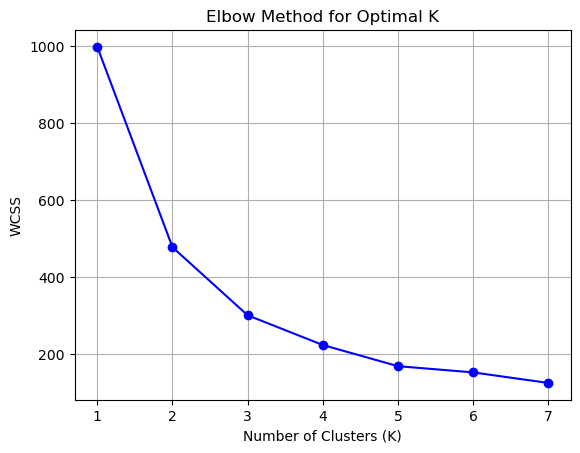

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(1, 8), wcss_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()

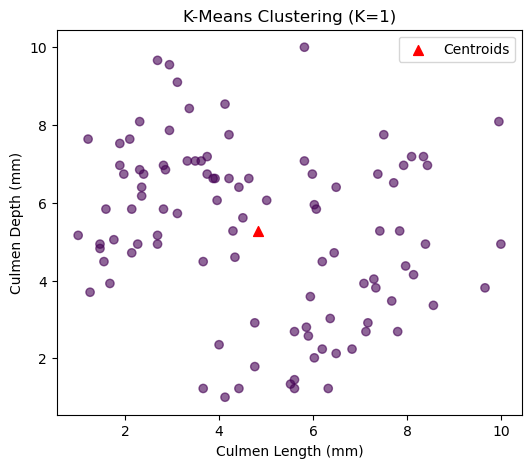

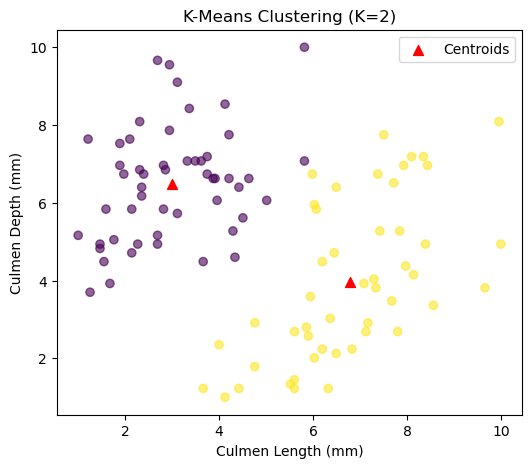

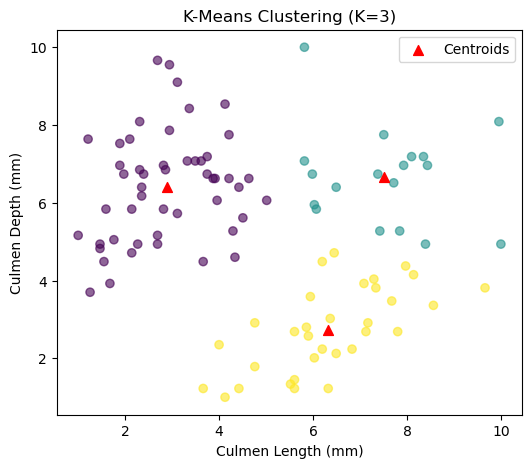

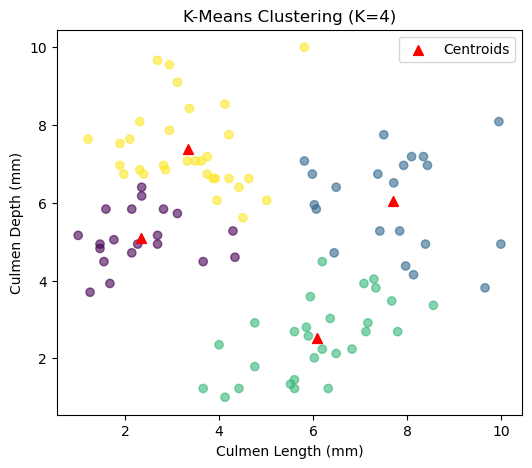

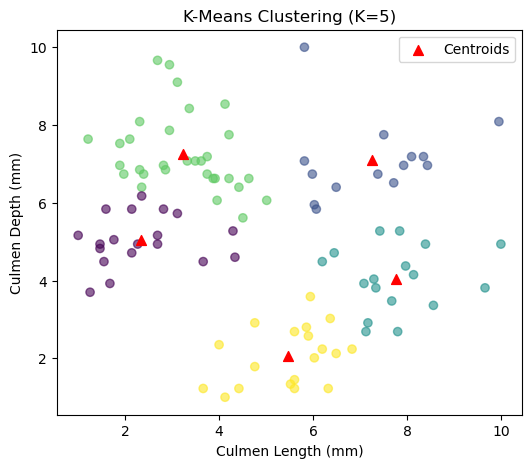

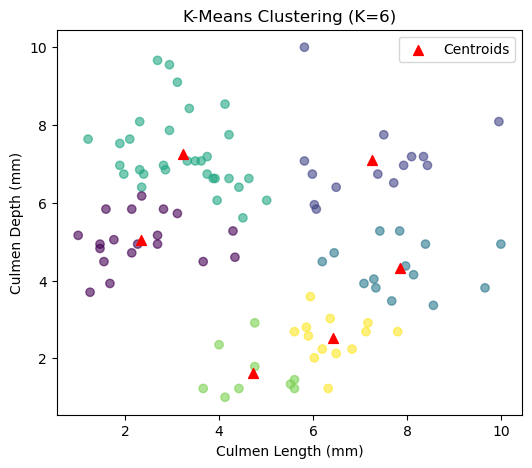

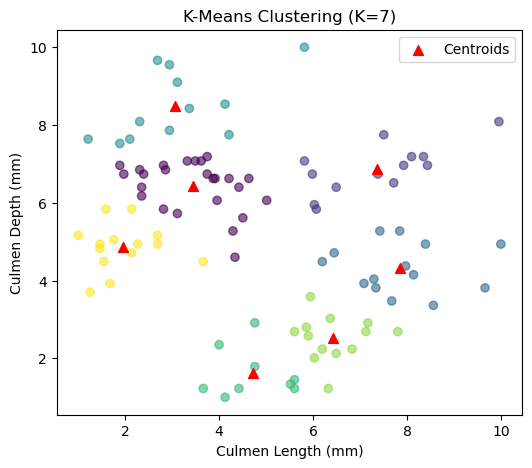

In [33]:
for k in range(1, 8):
    labels, centroids, _, _ = kmeans(X, k)

    plt.figure(figsize=(6, 5))  # Adjust figure size if needed
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='^', s=50, label='Centroids')  # Red triangle
    
    plt.xlabel("Culmen Length (mm)")
    plt.ylabel("Culmen Depth (mm)")
    plt.title(f"K-Means Clustering (K={k})")
    plt.legend()
    plt.show()

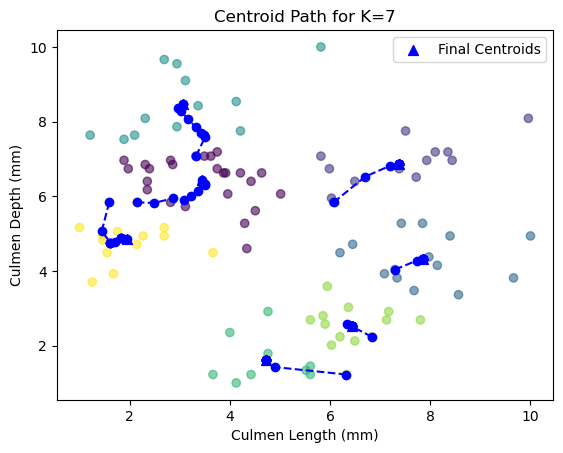

In [37]:
k = 7
labels, centroids, _, centroid_history = kmeans(X, k, track_path=True)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
for i in range(k):
    history = np.array([c[i] for c in centroid_history])
    plt.plot(history[:, 0], history[:, 1], 'b--', marker='o')

plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='^', s=50, label='Final Centroids')
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Centroid Path for K=7")
plt.legend()
plt.show()
